In [1]:
import sys 
import os 
import numpy as np
import pandas as pd
import sklearn as sk
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn import metrics as metrics_sk
from sklearn.metrics import precision_recall_curve
from scipy.stats import ks_2samp
from IPython.display import Image, display_svg, SVG

In [2]:
from keras import layers, Sequential
from keras.layers import Input, Add, Dropout, Dense, Activation, ZeroPadding1D, ZeroPadding2D, BatchNormalization, Flatten, Conv1D, AveragePooling1D, MaxPooling1D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras import metrics
from keras import optimizers
from keras import regularizers
import pydot
from tensorflow.keras import regularizers
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
import tensorflow as tf
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\benedito_deep\lib\site-packages\tensorflo

In [3]:
from keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

In [4]:
from keras.backend import log
def inv_h_sin(x, theta = 1):
    if x == 0:
        return x
    else:
        return log(theta*x + ((theta*x)**2 + 1)**0.5)/theta

In [5]:
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
get_custom_objects().update({'inv_h_sin': Activation(inv_h_sin)})

In [6]:
os.getcwd()

'C:\\Users\\Benedito'

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
os.chdir("C:/Users/Benedito/Desktop/MECAI/Introdução a Estatistica/MVP")

In [9]:
os.getcwd()

'C:\\Users\\Benedito\\Desktop\\MECAI\\Introdução a Estatistica\\MVP'

In [10]:
df = pd.read_csv("modelling_table_8_v2.csv")

In [11]:
data = df

In [12]:
data.head()

,Unnamed: 0,SK_ID_CURR,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,cnt_appl_previous_monotonic,MAX(previous.DAYS_DECISION)_monotonic,MAX(previous.HOUR_APPR_PROCESS_START)_monotonic,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_monotonic,MIN(previous.HOUR_APPR_PROCESS_START)_monotonic,MEAN(previous.AMT_CREDIT)_monotonic,avg_amt_application_previous_monotonic,SUM(previous.AMT_GOODS_PRICE)_monotonic,SUM(previous.DAYS_FIRST_DRAWING)_monotonic,MAX(previous.DAYS_FIRST_DRAWING)_monotonic,SUM(previous.CNT_PAYMENT)_monotonic,MAX(previous.CNT_PAYMENT)_monotonic,max_cnt_payment_previous_monotonic,avg_pos_cash_cnt_installment_previous_monotonic,MEDIAN(previous.CNT_PAYMENT)_monotonic,MEDIAN(previous.AMT_CREDIT)_monotonic,MEDIAN(previous.AMT_APPLICATION)_monotonic,gap_avg_application_credit_previous_monotonic,MIN(bureau.DAYS_CREDIT)_monotonic,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_monotonic,MAX(bureau.DAYS_CREDIT_UPDATE)_monotonic,MEAN(bureau.AMT_CREDIT_SUM)_monotonic,SUM(bureau.DAYS_CREDIT_ENDDATE)_monotonic,MIN(bureau.DAYS_CREDIT_ENDDATE)_monotonic,NONLIVINGAREA_MEDI_monotonic,STD(previous.AMT_CREDIT)_monotonic,MEAN(bureau.DAYS_ENDDATE_FACT)_monotonic,STD(bureau.DAYS_CREDIT)_monotonic,STD(previous.AMT_GOODS_PRICE)_monotonic,STD(previous.CNT_PAYMENT)_monotonic,amt_paid_down_monotonic,SUM(previous.RATE_DOWN_PAYMENT)_monotonic,MEAN(previous.AMT_DOWN_PAYMENT)_monotonic,MAX(previous.AMT_DOWN_PAYMENT)_monotonic,MIN(previous.CNT_PAYMENT)_monotonic,SKEW(previous.AMT_APPLICATION)_monotonic,SKEW(bureau.DAYS_CREDIT)_monotonic,SKEW(previous.DAYS_DECISION)_monotonic,SUM(bureau.AMT_CREDIT_SUM_DEBT)_monotonic,tot_debt_lim_ratio_monotonic,MAX(bureau.AMT_CREDIT_SUM_DEBT)_monotonic,cnt_seller_electronics_previous_monotonic,STD(bureau.DAYS_ENDDATE_FACT)_monotonic,cnt_cash_previous_monotonic,MEDIAN(previous.RATE_DOWN_PAYMENT)_monotonic,amt_credit_sum_consumer_credit_bureau_monotonic,cnt_yield_low_normal_previous_monotonic,MIN(previous.AMT_APPLICATION)_monotonic,cnt_product_xsell_previous_monotonic,cnt_portfolio_cash_previous_monotonic,OBS_30_CNT_SOCIAL_CIRCLE_monotonic,cnt_channel_contact_center_previous_monotonic,SKEW(previous.DAYS_TERMINATION)_monotonic,SKEW(bureau.DAYS_ENDDATE_FACT)_monotonic,cnt_refused_previous_monotonic,amt_credit_sum_debt_credit_card_bureau_monotonic,MIN(previous.RATE_DOWN_PAYMENT)_monotonic,SKEW(previous.AMT_DOWN_PAYMENT)_monotonic,num_loans_l6m_monotonic,down_payment_times_cnt_refused_previous_monotonic,max_installments_gap_amt_payment_previous_monotonic,cnt_yield_low_action_previous_monotonic,avg_amt_c

In [13]:
data.fillna(0, inplace=True)

In [14]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [15]:
data.set_index('SK_ID_CURR', inplace=True)

In [16]:
data = data.replace([np.inf, -np.inf], 0)

In [17]:
data.head()

,TARGET,mean_knn_target,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,CODE_GENDER_M,NAME_CONTRACT_TYPE_Revolving loans,NAME_EDUCATION_TYPE_Higher education,NAME_FAMILY_STATUS_Married,OCCUPATION_TYPE_Sales staff,MAX(previous.NFLAG_LAST_APPL_IN_DAY),FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY_2,FLAG_OWN_CAR_Y,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Lower secondary,MEDIAN(previous.NFLAG_INSURED_ON_APPROVAL),delinquency_12_24_mths_microloan_bureau,FLAG_DOCUMENT_13,WALLSMATERIAL_MODE_Monolithic,FLAG_PHONE,NAME_INCOME_TYPE_State servant,NAME_TYPE_SUITE_Other_A,REG_REGION_NOT_WORK_REGION,delinquency_6_12_mths_microloan_bureau,FLAG_WORK_PHONE,NAME_TYPE_SUITE_Family,FLAG_DOCUMENT_3,NAME_TYPE_SUITE_Group of people,CODE_GENDER_XNA,NAME_INCOME_TYPE_Student,credit_income_cluster_4,YEARS_BEGINEXPLUATATION_MEDI,NAME_HOUSING_TYPE_Office apartment,"WALLSMATERIAL_MODE_Stone, brick",amt_credit_sum_overdue_microloan_bureau,WALLSMATERIAL_MODE_Panel,credit_income_ratio_monotonic,remaining_pmts_monotonic,missing_rate_monotonic,days_phone_change_over_gap_amt_installment_monotonic,YEARS_BUILD_MODE_monotonic,ENTRANCES_AVG_monotonic,DAYS_ID_PUBLISH_monotonic,FLOORSMIN_AVG_monotonic,APARTMENTS_MEDI_monotonic,LIVINGAREA_MODE_monotonic,YEARS_BEGINEXPLUATATION_AVG_monotonic,income_over_credit_monotonic,days_phone_change_times_gap_days_installment_monotonic,FLOORSMIN_MEDI_monotonic,OWN_CAR_AGE_monotonic,AMT_GOODS_PRICE_monotonic,DAYS_REGISTRATION_monotonic,FLOORSMIN_MODE_monotonic,FLOORSMAX_AVG_monotonic,cnt_appl_previous_monotonic,MAX(previous.DAYS_DECISION)_monotonic,MAX(previous.HOUR_APPR_PROCESS_START)_monotonic,MEAN(previous.NFLAG_LAST_APPL_IN_DAY)_monotonic,MIN(previous.HOUR_APPR_PROCESS_START)_monotonic,MEAN(previous.AMT_CREDIT)_monotonic,avg_amt_application_previous_monotonic,SUM(previous.AMT_GOODS_PRICE)_monotonic,SUM(previous.DAYS_FIRST_DRAWING)_monotonic,MAX(previous.DAYS_FIRST_DRAWING)_monotonic,SUM(previous.CNT_PAYMENT)_monotonic,MAX(previous.CNT_PAYMENT)_monotonic,max_cnt_payment_previous_monotonic,avg_pos_cash_cnt_installment_previous_monotonic,MEDIAN(previous.CNT_PAYMENT)_monotonic,MEDIAN(previous.AMT_CREDIT)_monotonic,MEDIAN(previous.AMT_APPLICATION)_monotonic,gap_avg_application_credit_previous_monotonic,MIN(bureau.DAYS_CREDIT)_monotonic,MEDIAN(bureau.DAYS_CREDIT_UPDATE)_monotonic,MAX(bureau.DAYS_CREDIT_UPDATE)_monotonic,MEAN(bureau.AMT_CREDIT_SUM)_monotonic,SUM(bureau.DAYS_CREDIT_ENDDATE)_monotonic,MIN(bureau.DAYS_CREDIT_ENDDATE)_monotonic,NONLIVINGAREA_MEDI_monotonic,STD(previous.AMT_CREDIT)_monotonic,MEAN(bureau.DAYS_ENDDATE_FACT)_monotonic,STD(bureau.DAYS_CREDIT)_monotonic,STD(previous.AMT_GOODS_PRICE)_monotonic,STD(previous.CNT_PAYMENT)_monotonic,amt_paid_down_monotonic,SUM(previous.RATE_DOWN_PAYMENT)_monotonic,MEAN(previous.AMT_DOWN_PAYMENT)_monotonic,MAX(previous.AMT_DOWN_PAYMENT)_monotonic,MIN(previous.CNT_PAYMENT)_monotonic,SKEW(previous.AMT_APPLICATION)_monotonic,SKEW(bureau.DAYS_CREDIT)_monotonic,SKEW(previous.DAYS_DECISION)_monotonic,SUM(bureau.AMT_CREDIT_SUM_DEBT)_monotonic,tot_debt_lim_ratio_monotonic,MAX(bureau.AMT_CREDIT_SUM_DEBT)_monotonic,cnt_seller_electronics_previous_monotonic,STD(bureau.DAYS_ENDDATE_FACT)_monotonic,cnt_cash_previous_monotonic,MEDIAN(previous.RATE_DOWN_PAYMENT)_monotonic,amt_credit_sum_consumer_credit_bureau_monotonic,cnt_yield_low_normal_previous_monotonic,MIN(previous.AMT_APPLICATION)_monotonic,cnt_product_xsell_previous_monotonic,cnt_portfolio_cash_previous_monotonic,OBS_30_CNT_SOCIAL_CIRCLE_monotonic,cnt_channel_contact_center_previous_monotonic,SKEW(previous.DAYS_TERMINATION)_monotonic,SKEW(bureau.DAYS_ENDDATE_FACT)_monotonic,cnt_refused_previous_monotonic,amt_credit_sum_debt_credit_card_bureau_monotonic,MIN(previous.RATE_DOWN_PAYMENT)_monotonic,SKEW(previous.AMT_DOWN_PAYMENT)_monotonic,num_loans_l6m_monotonic,down_payment_times_cnt_refused_previous_monotonic,max_installments_gap_amt_payment_previous_monotonic,cnt_yield_low_action_previous_monotonic,avg_amt_credit_card_total_recei

In [18]:
np.random.seed(11235)
sample = data.sample(200000, random_state = 11235)

In [19]:
valid = data[~data.index.isin(sample.index)].sample(100000, random_state = 11235)
test_final = data[~((data.index.isin(valid.index))|data.index.isin(sample.index))]

In [20]:
X = sample.drop(['TARGET'], axis =1)
y = sample['TARGET']

In [21]:
X.fillna(0, inplace = True)

## Neural Network

In [22]:
### MELHOR DE TODAS
NN_Model = Sequential()
NN_Model.add(Dense(32, input_dim=X.shape[-1], activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(256, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5,seed = 11235))
NN_Model.add(Dense(32, activation='swish', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))
NN_Model.add(Dropout(0.5, seed = 11235))
NN_Model.add(Dense(1, activation='sigmoid', kernel_initializer = 'random_normal', bias_initializer = 'zeros'))

In [23]:
metrics_ = [metrics.FalseNegatives(name="fn"),metrics.FalsePositives(name="fp"),
           metrics.TrueNegatives(name="tn"),
           metrics.TruePositives(name="tp"),
           metrics.Precision(name="precision"),
           metrics.Recall(name="recall"),
           metrics.AUC(name="AUC"), 
           metrics.Accuracy(name="accuracy")]

In [24]:
NN_Model.compile(loss='binary_crossentropy', optimizer="adam", metrics=metrics_)
#tf.keras.metrics.Precision(), tf.keras.metrics.Recall() tf.keras.metrics.AUC()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
class_weight = {0: 1/(y==0).sum(), 1: 1/(y==1).sum()}

In [26]:
scaler = StandardScaler()

In [27]:
feats = X.columns
X = scaler.fit_transform(X)

X_valid = scaler.transform(valid[feats])
y_valid = valid['TARGET']
X_test_final = scaler.transform(test_final[feats])
y_test_final = test_final['TARGET']

In [28]:
NN_Model.fit(x = X, y = y, epochs = 128, batch_size = 2048, class_weight = class_weight)#, callbacks = [callback])


Epoch 1/128
200000/200000 [==============================] - 10s 49us/step - loss: 6.9271e-06 - fn: 7597.0000 - fp: 93521.0000 - tn: 90321.0000 - tp: 8561.0000 - precision: 0.0839 - recall: 0.5298 - AUC: 0.5163 - accuracy: 0.0000e+00
Epoch 2/128
200000/200000 [==============================] - 4s 20us/step - loss: 6.9205e-06 - fn: 7571.0000 - fp: 85636.0000 - tn: 98206.0000 - tp: 8587.0000 - precision: 0.0911 - recall: 0.5314 - AUC: 0.5436 - accuracy: 0.0000e+00
Epoch 3/128
200000/200000 [==============================] - 4s 21us/step - loss: 6.9103e-06 - fn: 7113.0000 - fp: 81752.0000 - tn: 102090.0000 - tp: 9045.0000 - precision: 0.0996 - recall: 0.5598 - AUC: 0.5727 - accuracy: 0.0000e+00
Epoch 4/128
200000/200000 [==============================] - 4s 20us/step - loss: 6.8920e-06 - fn: 6839.0000 - fp: 77596.0000 - tn: 106246.0000 - tp: 9319.0000 - precision: 0.1072 - recall: 0.5767 - AUC: 0.6042 - accuracy: 0.0000e+00
Epoch 5/128
200000/200000 [==============================] - 4s 

200000/200000 [==============================] - 4s 19us/step - loss: 5.6929e-06 - fn: 4789.0000 - fp: 50818.0000 - tn: 133024.0000 - tp: 11369.0000 - precision: 0.1828 - recall: 0.7036 - AUC: 0.7778 - accuracy: 0.0000e+00
Epoch 34/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6954e-06 - fn: 4877.0000 - fp: 50486.0000 - tn: 133356.0000 - tp: 11281.0000 - precision: 0.1826 - recall: 0.6982 - AUC: 0.7780 - accuracy: 5.0000e-060s - loss: 5.6957e-06 - fn: 4054.0000 - fp: 41866.0000 - tn: 110602.0000 - tp: 9366.0000 - precision: 0.1828 - recall: 0.6979 - AUC: 0.7781 - accur
Epoch 35/128
200000/200000 [==============================] - 4s 21us/step - loss: 5.6910e-06 - fn: 4902.0000 - fp: 50423.0000 - tn: 133419.0000 - tp: 11256.0000 - precision: 0.1825 - recall: 0.6966 - AUC: 0.7778 - accuracy: 0.0000e+00
Epoch 36/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6895e-06 - fn: 4843.0000 - fp: 50553.0000 - tn: 133289.0000 - tp: 11315.0

200000/200000 [==============================] - 4s 19us/step - loss: 5.6433e-06 - fn: 4745.0000 - fp: 51182.0000 - tn: 132660.0000 - tp: 11413.0000 - precision: 0.1823 - recall: 0.7063 - AUC: 0.7819 - accuracy: 0.0000e+002s - loss: 5.6757e-06 - fn: 1795.0000 - fp: 19345.0000 - tn: 50216.0000 - tp: 4420.0000 - precision: 0.1860 - recall
Epoch 62/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6363e-06 - fn: 4722.0000 - fp: 51205.0000 - tn: 132637.0000 - tp: 11436.0000 - precision: 0.1826 - recall: 0.7078 - AUC: 0.7827 - accuracy: 0.0000e+00
Epoch 63/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6283e-06 - fn: 4757.0000 - fp: 51160.0000 - tn: 132682.0000 - tp: 11401.0000 - precision: 0.1822 - recall: 0.7056 - AUC: 0.7829 - accuracy: 5.0000e-06 loss: 5.7076e-06 - fn: 304.0000 - fp: 3091.0000 - tn: 8180.0000 - tp: 713.0000 - precisio
Epoch 64/128
200000/200000 [==============================] - 4s 20us/step - loss: 5.6254e-06 - fn:

200000/200000 [==============================] - 4s 19us/step - loss: 5.6133e-06 - fn: 4672.0000 - fp: 51438.0000 - tn: 132404.0000 - tp: 11486.0000 - precision: 0.1825 - recall: 0.7109 - AUC: 0.7842 - accuracy: 0.0000e+00
Epoch 92/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6228e-06 - fn: 4641.0000 - fp: 51786.0000 - tn: 132056.0000 - tp: 11517.0000 - precision: 0.1819 - recall: 0.7128 - AUC: 0.7841 - accuracy: 5.0000e-06
Epoch 93/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.6049e-06 - fn: 4642.0000 - fp: 51284.0000 - tn: 132558.0000 - tp: 11516.0000 - precision: 0.1834 - recall: 0.7127 - AUC: 0.7849 - accuracy: 1.5000e-052s - loss: 5.5665e-06 - fn: 1661.0000 - fp: 18742.0000 - tn: 49049.0000 - tp: 4276.0000 - precision: 0.1858 - recal
Epoch 94/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.5960e-06 - fn: 4701.0000 - fp: 51303.0000 - tn: 132539.0000 - tp: 11457.0000 - precision: 0.1826 - recall

200000/200000 [==============================] - 4s 20us/step - loss: 5.5861e-06 - fn: 4595.0000 - fp: 51681.0000 - tn: 132161.0000 - tp: 11563.0000 - precision: 0.1828 - recall: 0.7156 - AUC: 0.7864 - accuracy: 1.5000e-05
Epoch 122/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.5987e-06 - fn: 4624.0000 - fp: 51442.0000 - tn: 132400.0000 - tp: 11534.0000 - precision: 0.1831 - recall: 0.7138 - AUC: 0.7857 - accuracy: 1.0000e-05
Epoch 123/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.5882e-06 - fn: 4650.0000 - fp: 51322.0000 - tn: 132520.0000 - tp: 11508.0000 - precision: 0.1832 - recall: 0.7122 - AUC: 0.7866 - accuracy: 0.0000e+00
Epoch 124/128
200000/200000 [==============================] - 4s 19us/step - loss: 5.5741e-06 - fn: 4683.0000 - fp: 51150.0000 - tn: 132692.0000 - tp: 11475.0000 - precision: 0.1832 - recall: 0.7102 - AUC: 0.7879 - accuracy: 0.0000e+00
Epoch 125/128
200000/200000 [==============================] - 4s 

In [29]:
predictions = NN_Model.predict(X_valid)
predictions_ = (predictions > 0.5).astype(int)

In [30]:
acc_valid = metrics_sk.accuracy_score(y_valid, (NN_Model.predict(X_valid)>0.5))
f1_valid = metrics_sk.f1_score(y_valid, (NN_Model.predict(X_valid)>0.5))
precision_valid = metrics_sk.precision_score(y_valid, (NN_Model.predict(X_valid)>0.5))
recall_valid = metrics_sk.recall_score(y_valid, (NN_Model.predict(X_valid)>0.5))
auc_valid = metrics_sk.roc_auc_score(y_valid, NN_Model.predict(X_valid))

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.71705
precision_valid:  0.17575097675014412
recall_valid:  0.6783632982021078
F1_valid:  0.2780109373012845
AUC_valid:  0.7659232824776366


In [31]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
f1_test_final = metrics_sk.f1_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
precision_test_final = metrics_sk.precision_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
recall_test_final = metrics_sk.recall_score(y_test_final, (NN_Model.predict(X_test_final)>0.5))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, NN_Model.predict(X_test_final))

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.71614964718413
precision_test_final:  0.1761436511329628
recall_test_final:  0.6843853820598007
F1_test_final:  0.279810298102981
AUC_test_final:  0.7684879705752379


In [32]:
df_NN_test_final = pd.DataFrame()
df_NN_test_final['score'] = NN_Model.predict(X_test_final).ravel()
df_NN_test_final['y_target'] = np.array(y_test_final)
df_NN_test_final['decile'] = pd.qcut(df_NN_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [33]:
decile_NN = pd.DataFrame()
decile_NN['event'] = df_NN_test_final[df_NN_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_NN['not_event'] = df_NN_test_final[df_NN_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_NN['bad_rate'] = (decile_NN['event']/(decile_NN['event']+decile_NN['not_event'])).round(4)

In [34]:
decile_NN

,event,not_event,bad_rate
decile,,,
1,9,743,0.0120
2,11,740,0.0146
3,19,732,0.0253
4,20,731,0.0266
5,29,722,0.0386
6,45,706,0.0599
7,68,683,0.0905
8,96,655,0.1278
9,103,648,0.1372


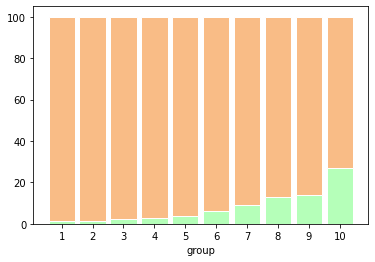

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_NN['event'], decile_NN['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_NN['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_NN['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()


## LightGBM

In [ ]:
#dtree = LGBMClassifier(max_depth = 2, min_samples_split=100, min_data_in_leaf = 250,n_estimators=300,
#                            min_impurity_decrease=1e-03, lambda_l1=0.3,
#                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [ ]:
###GRID SEARCH LGBM ---> NAO RODAR SEMPRE

list_i = [2, 4, 6]
list_j = [50, 100, 200]
list_k = [200, 300, 400]
list_l = [100, 200, 300]

for i in list_i:
    for j in list_j:
        for k in list_k:
            for l in list_l:
                dtree = LGBMClassifier(max_depth = i, min_samples_split=j, min_data_in_leaf = k,n_estimators=l,
                            min_impurity_decrease=1e-03, lambda_l1=0.3, lambda_l2=0.7, random_state=11235, eta = 0.005)
                class_tree = dtree.fit(X_train, y_train)
                auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])
                print('depth: ', i, 'samples_split: ', j, 'data_in_leaf: ', k, 'n_estimators: ', l, 'auc_valid: ', auc_valid)

In [36]:
dtree = LGBMClassifier(max_depth = 4, min_samples_split=50, min_data_in_leaf = 400,n_estimators=300,
                            min_impurity_decrease=1e-03, lambda_l1=0.3,
                       lambda_l2=0.7, random_state=11235, eta = 0.005)

In [37]:
class_tree = dtree.fit(X, y)

In [38]:
acc_valid = metrics_sk.accuracy_score(y_valid, class_tree.predict(X_valid))
f1_valid = metrics_sk.f1_score(y_valid, class_tree.predict(X_valid))
precision_valid = metrics_sk.precision_score(y_valid, class_tree.predict(X_valid))
recall_valid = metrics_sk.recall_score(y_valid, class_tree.predict(X_valid))
auc_valid = metrics_sk.roc_auc_score(y_valid, class_tree.predict_proba(X_valid)[:,1])

print('accuracy_valid: ',acc_valid)
print('precision_valid: ',precision_valid)
print('recall_valid: ',recall_valid)
print('F1_valid: ',f1_valid)
print('AUC_valid: ',auc_valid)

accuracy_valid:  0.91989
precision_valid:  0.5487364620938628
recall_valid:  0.03769373837569746
F1_valid:  0.0705418261979348
AUC_valid:  0.7791603389966179


In [39]:
acc_test_final = metrics_sk.accuracy_score(y_test_final, (class_tree.predict(X_test_final)))
f1_test_final = metrics_sk.f1_score(y_test_final, (class_tree.predict(X_test_final)))
precision_test_final = metrics_sk.precision_score(y_test_final, (class_tree.predict(X_test_final)))
recall_test_final = metrics_sk.recall_score(y_test_final, (class_tree.predict(X_test_final)))
auc_test_final = metrics_sk.roc_auc_score(y_test_final, class_tree.predict_proba(X_test_final)[:,1])

print('accuracy_test_final: ',acc_test_final)
print('precision_test_final: ',precision_test_final)
print('recall_test_final: ',recall_test_final)
print('F1_test_final: ',f1_test_final)
print('AUC_test_final: ',auc_test_final)

accuracy_test_final:  0.9201171614964718
precision_test_final:  0.525
recall_test_final:  0.03488372093023256
F1_test_final:  0.06542056074766356
AUC_test_final:  0.77759689441621


In [40]:
df_class_tree_test_final = pd.DataFrame()
df_class_tree_test_final['score'] = class_tree.predict_proba(X_test_final)[:,1].ravel()
df_class_tree_test_final['y_target'] = np.array(y_test_final)
df_class_tree_test_final['decile'] = pd.qcut(df_class_tree_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [41]:
decile_class_tree = pd.DataFrame()
decile_class_tree['event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_class_tree['not_event'] = df_class_tree_test_final[df_class_tree_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_class_tree['bad_rate'] = (decile_class_tree['event']/(decile_class_tree['event']+decile_class_tree['not_event'])).round(4)

In [42]:
decile_class_tree

,event,not_event,bad_rate
decile,,,
1,6,746,0.0080
2,15,736,0.0200
3,17,734,0.0226
4,23,728,0.0306
5,21,730,0.0280
6,39,712,0.0519
7,67,684,0.0892
8,95,656,0.1265
9,116,635,0.1545


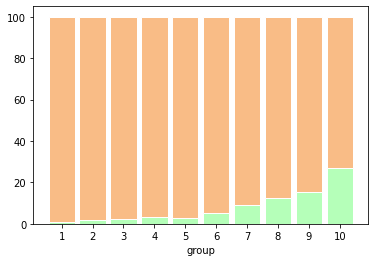

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_class_tree['event'], decile_class_tree['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_class_tree['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_class_tree['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

## Stacking NN+LGBM

In [44]:
pred_nn = NN_Model.predict(X_valid)
pred_lgbm = class_tree.predict_proba(X_valid)[:,1].reshape(-1, 1)


In [45]:
X_stack = np.zeros((pred_nn.shape[0], 2))

In [46]:
X_stack[:,0] = pred_nn.reshape(1, -1)
X_stack[:,1] = pred_lgbm.reshape(1, -1)
#X_stack[:,2] = pred_nn.reshape(1, -1)**2
#X_stack[:,3] = pred_lgbm.reshape(1, -1)**2
#X_stack[:,4] = pred_nn.reshape(1, -1)**3
#X_stack[:,5] = pred_lgbm.reshape(1, -1)**3

In [47]:
class_weight = {0: 1/(y_valid==0).sum(), 1: 1/(y_valid==1).sum()}

In [48]:
lr = LogisticRegression()#class_weight=class_weight

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
nb = GaussianNB(var_smoothing = 0.01)

In [51]:
lr_ = lr.fit(X_stack, y_valid)

In [52]:
nb_ = nb.fit(X_stack, y_valid)

## Validação - supervisor logistico

In [53]:
acc_stack = metrics_sk.accuracy_score(y_valid, lr_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, lr_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, lr_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, lr_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, lr_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.91994
precision_stack:  0.5420827389443652
recall_stack:  0.047117172969621826
F1_stack:  0.08669860825918321
AUC_stack:  0.7733440824572443


## Validação - supervisor Naive Bayes

In [54]:
acc_stack = metrics_sk.accuracy_score(y_valid, nb_.predict(X_stack))
f1_stack = metrics_sk.f1_score(y_valid, nb_.predict(X_stack))
precision_stack = metrics_sk.precision_score(y_valid, nb_.predict(X_stack))
recall_stack = metrics_sk.recall_score(y_valid, nb_.predict(X_stack))
auc_stack = metrics_sk.roc_auc_score(y_valid, nb_.predict_proba(X_stack)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.89312
precision_stack:  0.32031785176051514
recall_stack:  0.2898946063236206
F1_stack:  0.30434782608695654
AUC_stack:  0.772637793535292


In [55]:
pred_nn_final = NN_Model.predict(X_test_final)
pred_lgbm_final = class_tree.predict_proba(X_test_final)[:,1].reshape(-1, 1)

In [56]:
X_stack_final = np.zeros((pred_nn_final.shape[0], 2))

In [57]:
X_stack_final[:,0] = pred_nn_final.reshape(1, -1)
X_stack_final[:,1] = pred_lgbm_final.reshape(1, -1)
#X_stack_final[:,2] = pred_nn_final.reshape(1, -1)**2
#X_stack_final[:,3] = pred_lgbm_final.reshape(1, -1)**2
#X_stack_final[:,4] = pred_nn_final.reshape(1, -1)**3
#X_stack_final[:,5] = pred_lgbm_final.reshape(1, -1)**3

## Teste final - supervisor Naive Bayes

In [58]:
acc_stack = metrics_sk.accuracy_score(y_test_final, nb_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, nb_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, nb_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, nb_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, nb_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.8896285448009585
precision_stack:  0.2998236331569665
recall_stack:  0.2823920265780731
F1_stack:  0.2908468776732249
AUC_stack:  0.775217841430769


## Teste final - supervisor logístico

In [59]:
acc_stack = metrics_sk.accuracy_score(y_test_final, lr_.predict(X_stack_final))
f1_stack = metrics_sk.f1_score(y_test_final, lr_.predict(X_stack_final))
precision_stack = metrics_sk.precision_score(y_test_final, lr_.predict(X_stack_final))
recall_stack = metrics_sk.recall_score(y_test_final, lr_.predict(X_stack_final))
auc_stack = metrics_sk.roc_auc_score(y_test_final, lr_.predict_proba(X_stack_final)[:,1])

print('accuracy_stack: ',acc_stack)
print('precision_stack: ',precision_stack)
print('recall_stack: ',recall_stack)
print('F1_stack: ',f1_stack)
print('AUC_stack: ',auc_stack)

accuracy_stack:  0.9194514711756091
precision_stack:  0.46938775510204084
recall_stack:  0.03820598006644518
F1_stack:  0.0706605222734255
AUC_stack:  0.776081705743724


# Optimizing F1 Score

In [60]:
#### optimizing f1 score
X_opt = np.zeros((X_stack.shape[0], 4))

In [61]:
X_opt[:,0] = 1
X_opt[:,1:3]=X_stack
X_opt[:,3] = y_valid

In [ ]:
#def sigmoid(x): resulta em overflow essa merda
#    return 1/(1+np.exp(-x))

In [62]:
def sigmoid(x): ##corrigido
    if x.all()>=0:
        z = np.exp(-x)
        return 1/(1+z)
    else:
        z = np.exp(-x)
        return z/(1+z)

In [63]:
def sigmoid1(x): ##derivada
    return sigmoid(x)*(1-sigmoid(x))

In [64]:
alpha = 0.25 ##obtive via grid search 
gamma = 2

In [65]:
def f(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    F = A/(alpha*npos +(1-alpha)*mpos)
    return -F

In [66]:
def logf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    logF = np.log(A) - np.log((alpha*npos +(1-alpha)*mpos))
    return -logF.round(3)

In [67]:
def df(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    h = 1/(alpha*npos + (1-alpha)*mpos)
    dF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dF[j] = h*dA[j]-(h**2)*A*(1-alpha)*dmpos[j]
    return -dF
        
    

In [68]:
def dlogf(theta, alpha = alpha,X_opt = X_opt, gamma = gamma):
    A = np.sum(sigmoid(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta)))
    npos = X_opt[:,3].sum()
    mpos = np.sum(sigmoid(gamma*np.dot(X_opt[:,:3], theta)))
    dlogF=np.zeros((theta.shape))
    dA = np.zeros((theta.shape))
    dmpos = np.zeros((theta.shape))
    
    for j in range(X_opt.shape[1]-1):
        dA[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[X_opt[:,3]==1,:3], theta))*gamma*X_opt[X_opt[:,3]==1,j])
        dmpos[j] = np.sum(sigmoid1(gamma*np.dot(X_opt[:,:3], theta))*gamma*X_opt[:,j])
        dlogF[j] = (1/A)*dA[j] - (1/(alpha*npos + (1-alpha)*mpos))*(1-alpha)*dmpos[j]
    return -dlogF.round(3)

In [69]:
from scipy import optimize

In [70]:
def predict_opt(X, theta_opt):
    score = sigmoid(np.dot(X[:,:-1], theta_opt))
    predict = (score>0.5).astype(int)
    return (score, predict)

In [71]:
##GRID SEARCH + RANDOM INITIALIZATION --> nao rodar sempre
np.random.seed(42)
#theta_matrix = np.random.normal(loc=0.0, scale=20.0, size=(150, 3)).round(3)
theta_matrix = np.random.randint(low=-30, high=30, size=(200, 3))

list_alpha = [0.25, 0.5] 
list_gamma = [2, 4]

lista_alpha = []
lista_gamma = []
lista_theta = []
lista_theta_opt = []
lista_auc = []
lista_precision = []
lista_recall = []
lista_f1 = []

for i in range(len(list_alpha)):
    for j in range(len(list_gamma)):
        for k in range(theta_matrix.shape[0]):
            
            alpha = list_alpha[i]
            gamma = list_gamma[j]
            theta = theta_matrix[k,:].T
            theta_opt = optimize.minimize(logf, theta, jac = dlogf, method = 'bfgs').x
            #theta_opt,k = bfgs_method(f, df, theta, maxiter = None, epsi = 0.0001)
            score, predicted = predict_opt(X_opt, theta_opt)
            print('alpha = ', alpha, 'gamma = ', gamma, 'theta_init = ', theta,
                  'theta_opt = ', theta_opt,
                  'AUC = ', metrics_sk.roc_auc_score(y_valid, score),
                  'precision = ', metrics_sk.precision_score(y_valid, predicted),
                  'recall = ', metrics_sk.recall_score(y_valid, predicted),
                  'F1 = ', metrics_sk.f1_score(y_valid, predicted))
            lista_alpha.append(alpha)
            lista_gamma.append(gamma)
            lista_theta.append(theta)
            lista_theta_opt.append(theta_opt)
            lista_auc.append(metrics_sk.roc_auc_score(y_valid, score))
            lista_precision.append(metrics_sk.precision_score(y_valid, predicted))
            lista_recall.append(metrics_sk.recall_score(y_valid, predicted))
            lista_f1.append(metrics_sk.f1_score(y_valid, predicted))

alpha =  0.25 gamma =  2 theta_init =  [ 8 21 -2] theta_opt =  [ 8. 21. -2.] AUC =  0.76429190533987 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-16  12 -23] theta_opt =  [  0.8675139   24.71810548 -21.10240469] AUC =  0.7311502833732734 precision =  0.08064403220161008 recall =  0.9998760074395536 F1 =  0.14925041643531373
alpha =  0.25 gamma =  2 theta_init =  [-10   8  27] theta_opt =  [-11.67044224   6.84939553  26.74893968] AUC =  0.7768030480307474 precision =  0.32907495767277206 recall =  0.26509609423434594 F1 =  0.29364098338140365
alpha =  0.25 gamma =  2 theta_init =  [-12  -8 -20] theta_opt =  [ 22.9570493   -3.40398858 -19.05088541] AUC =  0.22229478352906484 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-20  -7  22] theta_opt =  [-9.31199358  2.92814413 30.43542726] AUC =  0.7787369894043917 precision =  0.3251231527093596 recall =  0.2782393056416615 F1 =  0.2

alpha =  0.25 gamma =  2 theta_init =  [ -7 -30  13] theta_opt =  [ 51.83220806 -28.7948312   23.32370912] AUC =  0.3854804023881263 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-23  -7 -20] theta_opt =  [ 62.2398946    3.10092751 -18.4656819 ] AUC =  0.5 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 20 -14 -23] theta_opt =  [ 25.9432872   -9.14440526 -20.9935135 ] AUC =  0.2248702695720456 precision =  0.08064080640806408 recall =  0.9998760074395536 F1 =  0.14924489191590168
alpha =  0.25 gamma =  2 theta_init =  [4 4 2] theta_opt =  [4. 4. 2.] AUC =  0.7698934693711166 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28 -26  11] theta_opt =  [ 28. -26.  11.] AUC =  0.2437933975225967 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 8 27 10] theta_opt =  [ 8. 27. 10.] A

alpha =  0.25 gamma =  2 theta_init =  [ 18  25 -14] theta_opt =  [ 18.  25. -14.] AUC =  0.7504891347026058 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ 28  18 -29] theta_opt =  [ 28.  18. -29.] AUC =  0.6232799090411023 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-29  -3  23] theta_opt =  [-15.60897503   9.6011909   33.64368114] AUC =  0.7764925642395866 precision =  0.33386581469648563 recall =  0.25914445133292 F1 =  0.2917975567190227
alpha =  0.25 gamma =  2 theta_init =  [-8  6  1] theta_opt =  [-41.35928608  33.58009425  68.51436287] AUC =  0.7747217856655039 precision =  0.32148355493351993 recall =  0.2848109113453193 F1 =  0.3020381328073636
alpha =  0.25 gamma =  2 theta_init =  [  2 -30 -12] theta_opt =  [ 35.61735494 -26.28401791 -11.01307844] AUC =  0.23060053244578207 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  2 theta_init =  [-6  4 -6] theta_opt =  [-2296.27269515  2194.54790817  2152.88781778] AUC =  0.6998789604140584 precision =  0.3420081210778885 recall =  0.22975821450712958 F1 =  0.27486464436698066
alpha =  0.25 gamma =  2 theta_init =  [ -2 -13  15] theta_opt =  [ 7.09483218 -9.83963293 17.20404045] AUC =  0.399827268187371 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-13 -29  23] theta_opt =  [ 21.21055797 -28.37773492  30.87794931] AUC =  0.29402001218481305 precision =  0.0806564525162013 recall =  1.0 F1 =  0.14927306884329566
alpha =  0.25 gamma =  2 theta_init =  [  4 -15  10] theta_opt =  [ 12.08776203 -11.94585762  10.68984444] AUC =  0.2725704159496229 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [  5   2 -27] theta_opt =  [ 13.88709255   8.74040252 -24.83472227] AUC =  0.44393116366245844 precision =  0.08065 recall =  1.0 F1 =  0.149262018

alpha =  0.25 gamma =  2 theta_init =  [-23  15 -15] theta_opt =  [-123.02498503   98.70078071  194.80934084] AUC =  0.7745181693405786 precision =  0.33281709772340096 recall =  0.26646001239925604 F1 =  0.29596474314832666
alpha =  0.25 gamma =  2 theta_init =  [-17 -19  20] theta_opt =  [ 15.1664004  -18.12332143  27.68865323] AUC =  0.3623920536595726 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.72238152 -14.29667382  -2.38807723] AUC =  0.23253969395544868 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [  3 -29   1] theta_opt =  [ 27.64961321 -25.648161     1.69988395] AUC =  0.23526458337990558 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  2 theta_init =  [-8 -9 20] theta_opt =  [-23.19924753  18.81135582  35.50238671] AUC =  0.7744437596429807 precision =  0.3340729001584786 recall =  0.26137631742095474

alpha =  0.25 gamma =  4 theta_init =  [-4 28 11] theta_opt =  [-22.42182448  25.29864779  10.54951632] AUC =  0.7693876118235102 precision =  0.32409927942353883 recall =  0.2509609423434594 F1 =  0.28287910552061496
alpha =  0.25 gamma =  4 theta_init =  [ -3  29 -15] theta_opt =  [-16.11866609  27.60386942 -15.32062137] AUC =  0.750739726856939 precision =  0.2195675292449486 recall =  0.3840049597024179 F1 =  0.27938655841226884
alpha =  0.25 gamma =  4 theta_init =  [-16  16  20] theta_opt =  [-16.72318591  15.43704312  19.89348519] AUC =  0.7730600682151271 precision =  0.33019740900678596 recall =  0.26546807191568506 F1 =  0.29431576053336994
alpha =  0.25 gamma =  4 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.770406415001623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23791512379817933 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =

alpha =  0.25 gamma =  4 theta_init =  [ 16 -17 -28] theta_opt =  [ 31.92105818  -6.17235112 -25.40528874] AUC =  0.2230534430728522 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-30 -26  -5] theta_opt =  [ 55.7857598  -23.08328417  -3.41296344] AUC =  0.4006827588604325 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24558118452850408 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -4 -22 -16] theta_opt =  [ 33.2011022  -19.04201432 -15.23440396] AUC =  0.2286237375384931 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-16  -5  11] theta_opt =  [-7.33616259  3.61253045 18.07003458] AUC =  0.7774486779066492 precision =  0.3390579833361673 recall =  0.2472411655300682 F1 =  0.28596013193747316
alpha =  0.25 gamma =  4 theta

alpha =  0.25 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-13.49947766  23.68998853 -13.52347926] AUC =  0.7499722083896372 precision =  0.21386946386946387 recall =  0.40954742715437076 F1 =  0.28099876642987787
alpha =  0.25 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [ 10.27327985 -14.15089799  33.97700317] AUC =  0.5000452656802087 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.89066808 -21.6136209  -13.46846471] AUC =  0.2294376957277054 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 33.75153454 -25.35882322 -10.26615804] AUC =  0.2306915527092631 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6425879803822421 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_i

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.25 gamma =  4 theta_init =  [-6  4 -6] theta_opt =  [-2296.27269515  2194.54790817  2152.88781778] AUC =  0.6998789604140584 precision =  0.3420081210778885 recall =  0.22975821450712958 F1 =  0.27486464436698066
alpha =  0.25 gamma =  4 theta_init =  [ -2 -13  15] theta_opt =  [ 7.09483218 -9.83963293 17.20404045] AUC =  0.399827268187371 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-13 -29  23] theta_opt =  [ 21.21055797 -28.37773492  30.87794931] AUC =  0.29402001218481305 precision =  0.0806564525162013 recall =  1.0 F1 =  0.14927306884329566
alpha =  0.25 gamma =  4 theta_init =  [  4 -15  10] theta_opt =  [ 12.08776203 -11.94585762  10.68984444] AUC =  0.2725704159496229 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [  5   2 -27] theta_opt =  [ 13.88709255   8.74040252 -24.83472227] AUC =  0.44393116366245844 precision =  0.08065 recall =  1.0 F1 =  0.149262018

alpha =  0.25 gamma =  4 theta_init =  [-23  15 -15] theta_opt =  [-123.02498503   98.70078071  194.80934084] AUC =  0.7745181693405786 precision =  0.33281709772340096 recall =  0.26646001239925604 F1 =  0.29596474314832666
alpha =  0.25 gamma =  4 theta_init =  [-17 -19  20] theta_opt =  [ 15.1664004  -18.12332143  27.68865323] AUC =  0.3623920536595726 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.72238152 -14.29667382  -2.38807723] AUC =  0.23253969395544868 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [  3 -29   1] theta_opt =  [ 27.64961321 -25.648161     1.69988395] AUC =  0.23526458337990558 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.25 gamma =  4 theta_init =  [-8 -9 20] theta_opt =  [-23.19924753  18.81135582  35.50238671] AUC =  0.7744437596429807 precision =  0.3340729001584786 recall =  0.26137631742095474

alpha =  0.5 gamma =  2 theta_init =  [-4 28 11] theta_opt =  [-22.42182448  25.29864779  10.54951632] AUC =  0.7693876118235102 precision =  0.32409927942353883 recall =  0.2509609423434594 F1 =  0.28287910552061496
alpha =  0.5 gamma =  2 theta_init =  [ -3  29 -15] theta_opt =  [-16.11866609  27.60386942 -15.32062137] AUC =  0.750739726856939 precision =  0.2195675292449486 recall =  0.3840049597024179 F1 =  0.27938655841226884
alpha =  0.5 gamma =  2 theta_init =  [-16  16  20] theta_opt =  [-16.72318591  15.43704312  19.89348519] AUC =  0.7730600682151271 precision =  0.33019740900678596 recall =  0.26546807191568506 F1 =  0.29431576053336994
alpha =  0.5 gamma =  2 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.770406415001623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23791512379817933 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5

alpha =  0.5 gamma =  2 theta_init =  [ 16 -17 -28] theta_opt =  [ 31.92105818  -6.17235112 -25.40528874] AUC =  0.2230534430728522 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-30 -26  -5] theta_opt =  [ 55.7857598  -23.08328417  -3.41296344] AUC =  0.4006827588604325 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24558118452850408 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -4 -22 -16] theta_opt =  [ 33.2011022  -19.04201432 -15.23440396] AUC =  0.2286237375384931 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-16  -5  11] theta_opt =  [-7.33616259  3.61253045 18.07003458] AUC =  0.7774486779066492 precision =  0.3390579833361673 recall =  0.2472411655300682 F1 =  0.28596013193747316
alpha =  0.5 gamma =  2 theta_init 

alpha =  0.5 gamma =  2 theta_init =  [-20  17 -15] theta_opt =  [-13.49947766  23.68998853 -13.52347926] AUC =  0.7499722083896372 precision =  0.21386946386946387 recall =  0.40954742715437076 F1 =  0.28099876642987787
alpha =  0.5 gamma =  2 theta_init =  [  2 -22  29] theta_opt =  [ 10.27327985 -14.15089799  33.97700317] AUC =  0.5000452656802087 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.89066808 -21.6136209  -13.46846471] AUC =  0.2294376957277054 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -2 -28 -11] theta_opt =  [ 33.75153454 -25.35882322 -10.26615804] AUC =  0.2306915527092631 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6425879803822421 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init = 

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  2 theta_init =  [-6  4 -6] theta_opt =  [-2296.27269515  2194.54790817  2152.88781778] AUC =  0.6998789604140584 precision =  0.3420081210778885 recall =  0.22975821450712958 F1 =  0.27486464436698066
alpha =  0.5 gamma =  2 theta_init =  [ -2 -13  15] theta_opt =  [ 7.09483218 -9.83963293 17.20404045] AUC =  0.399827268187371 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-13 -29  23] theta_opt =  [ 21.21055797 -28.37773492  30.87794931] AUC =  0.29402001218481305 precision =  0.0806564525162013 recall =  1.0 F1 =  0.14927306884329566
alpha =  0.5 gamma =  2 theta_init =  [  4 -15  10] theta_opt =  [ 12.08776203 -11.94585762  10.68984444] AUC =  0.2725704159496229 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [  5   2 -27] theta_opt =  [ 13.88709255   8.74040252 -24.83472227] AUC =  0.44393116366245844 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976

alpha =  0.5 gamma =  2 theta_init =  [-23  15 -15] theta_opt =  [-123.02498503   98.70078071  194.80934084] AUC =  0.7745181693405786 precision =  0.33281709772340096 recall =  0.26646001239925604 F1 =  0.29596474314832666
alpha =  0.5 gamma =  2 theta_init =  [-17 -19  20] theta_opt =  [ 15.1664004  -18.12332143  27.68865323] AUC =  0.3623920536595726 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.72238152 -14.29667382  -2.38807723] AUC =  0.23253969395544868 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [  3 -29   1] theta_opt =  [ 27.64961321 -25.648161     1.69988395] AUC =  0.23526458337990558 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  2 theta_init =  [-8 -9 20] theta_opt =  [-23.19924753  18.81135582  35.50238671] AUC =  0.7744437596429807 precision =  0.3340729001584786 recall =  0.26137631742095474 F1 =

alpha =  0.5 gamma =  4 theta_init =  [-4 28 11] theta_opt =  [-22.42182448  25.29864779  10.54951632] AUC =  0.7693876118235102 precision =  0.32409927942353883 recall =  0.2509609423434594 F1 =  0.28287910552061496
alpha =  0.5 gamma =  4 theta_init =  [ -3  29 -15] theta_opt =  [-16.11866609  27.60386942 -15.32062137] AUC =  0.750739726856939 precision =  0.2195675292449486 recall =  0.3840049597024179 F1 =  0.27938655841226884
alpha =  0.5 gamma =  4 theta_init =  [-16  16  20] theta_opt =  [-16.72318591  15.43704312  19.89348519] AUC =  0.7730600682151271 precision =  0.33019740900678596 recall =  0.26546807191568506 F1 =  0.29431576053336994
alpha =  0.5 gamma =  4 theta_init =  [13 24 21] theta_opt =  [13. 24. 21.] AUC =  0.770406415001623 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 26 -28   6] theta_opt =  [ 26. -28.   6.] AUC =  0.23791512379817933 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5

alpha =  0.5 gamma =  4 theta_init =  [ 16 -17 -28] theta_opt =  [ 31.92105818  -6.17235112 -25.40528874] AUC =  0.2230534430728522 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-30 -26  -5] theta_opt =  [ 55.7857598  -23.08328417  -3.41296344] AUC =  0.4006827588604325 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 24 -17   8] theta_opt =  [ 24. -17.   8.] AUC =  0.24558118452850408 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -4 -22 -16] theta_opt =  [ 33.2011022  -19.04201432 -15.23440396] AUC =  0.2286237375384931 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-16  -5  11] theta_opt =  [-7.33616259  3.61253045 18.07003458] AUC =  0.7774486779066492 precision =  0.3390579833361673 recall =  0.2472411655300682 F1 =  0.28596013193747316
alpha =  0.5 gamma =  4 theta_init 

alpha =  0.5 gamma =  4 theta_init =  [-20  17 -15] theta_opt =  [-13.49947766  23.68998853 -13.52347926] AUC =  0.7499722083896372 precision =  0.21386946386946387 recall =  0.40954742715437076 F1 =  0.28099876642987787
alpha =  0.5 gamma =  4 theta_init =  [  2 -22  29] theta_opt =  [ 10.27327985 -14.15089799  33.97700317] AUC =  0.5000452656802087 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ 28 -25 -15] theta_opt =  [ 31.89066808 -21.6136209  -13.46846471] AUC =  0.2294376957277054 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -2 -28 -11] theta_opt =  [ 33.75153454 -25.35882322 -10.26615804] AUC =  0.2306915527092631 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [29 28  5] theta_opt =  [29. 28.  5.] AUC =  0.6425879803822421 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init = 

C:\Anaconda3\envs\benedito_deep\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


alpha =  0.5 gamma =  4 theta_init =  [-6  4 -6] theta_opt =  [-2296.27269515  2194.54790817  2152.88781778] AUC =  0.6998789604140584 precision =  0.3420081210778885 recall =  0.22975821450712958 F1 =  0.27486464436698066
alpha =  0.5 gamma =  4 theta_init =  [ -2 -13  15] theta_opt =  [ 7.09483218 -9.83963293 17.20404045] AUC =  0.399827268187371 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-13 -29  23] theta_opt =  [ 21.21055797 -28.37773492  30.87794931] AUC =  0.29402001218481305 precision =  0.0806564525162013 recall =  1.0 F1 =  0.14927306884329566
alpha =  0.5 gamma =  4 theta_init =  [  4 -15  10] theta_opt =  [ 12.08776203 -11.94585762  10.68984444] AUC =  0.2725704159496229 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [  5   2 -27] theta_opt =  [ 13.88709255   8.74040252 -24.83472227] AUC =  0.44393116366245844 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976

alpha =  0.5 gamma =  4 theta_init =  [-23  15 -15] theta_opt =  [-123.02498503   98.70078071  194.80934084] AUC =  0.7745181693405786 precision =  0.33281709772340096 recall =  0.26646001239925604 F1 =  0.29596474314832666
alpha =  0.5 gamma =  4 theta_init =  [-17 -19  20] theta_opt =  [ 15.1664004  -18.12332143  27.68865323] AUC =  0.3623920536595726 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [ -8 -16  -3] theta_opt =  [ 16.72238152 -14.29667382  -2.38807723] AUC =  0.23253969395544868 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [  3 -29   1] theta_opt =  [ 27.64961321 -25.648161     1.69988395] AUC =  0.23526458337990558 precision =  0.08065 recall =  1.0 F1 =  0.14926201822976914
alpha =  0.5 gamma =  4 theta_init =  [-8 -9 20] theta_opt =  [-23.19924753  18.81135582  35.50238671] AUC =  0.7744437596429807 precision =  0.3340729001584786 recall =  0.26137631742095474 F1 =

In [72]:
results = pd.DataFrame()
results['alpha']=lista_alpha
results['gamma']=lista_gamma
results['theta']=lista_theta
results['theta_opt']=lista_theta_opt
results['AUC']=lista_auc
results['Precision'] = lista_precision
results['Recall'] = lista_recall
results['F1'] = lista_f1
results.to_csv("resultados_otimizacao_log_table_8_v2.csv")

In [ ]:
#alpha =  0.25 gamma =  2 theta_init =  [-1 -4  9] theta_opt =  [-568.50174834  322.85256065 2247.08499949] AUC =  0.7829109328873998 precision =  0.2642267969778887 recall =  0.4726596404215747 F1 =  0.338964965321003
#alpha =  0.25 gamma =  2 theta_init =  [0 3 5] theta_opt =  [-431.15928105  220.73593698 1731.39766752] AUC =  0.7840137316349044 precision =  0.26989136817381093 recall =  0.45592064476131433 F1 =  0.3390658859329614
#0.1	2	[-12.902   7.228  30.761]	[-12.902   7.228  30.761]	0.7882440904853698	0.34440142942227514	0.28679479231246124	0,312969353
#0.1	2	[-21.154  16.451 -24.417]	[-89.98832355  91.3083205   81.7098475 ]	0.7784056931783964	0.3293559516963772	0.28406695598264103	0,305039611
#0.25	2	[ -5.051 -24.956  32.648]	[-11.94642079   0.16685741  50.35630243]	0.7865348206371445	0.33280689160086147	0.2874147551146931	0,308449767
#0.25	2	[-18.16  -28.246  29.313]	[-18.25223462   5.61979402  59.03788049]	0.7871950151039016	0.3361270401411557	0.28344699318040917	0,307547424

#0.25	2	[ -0.717  31.293 -52.395]	[-1968.81416686  2356.06814755  1390.76945771]	0.7442478049348258	0.2828002298410266	0.3661500309981401	0,319122494

#	0.25	2	[ -9.685  25.338 -14.153]	[-233.99079602  188.47355835  372.24989718]	0.7836955872384971	0.33852496564360973	0.2748915065096094	0,303407691

#0.25	2	[-19   8 -29]	[-155.83910967  190.17488829   98.17151583]	0.7791330501134744	0.2813565744600227	0.36825790452572843	0,318994683
#0.25	2	[-20  -7  22]	[-8.48470663  1.43889145 30.69991719]	0.7872147735311658	0.3399938987187309	0.2763794172349659	0,304903905
#0.25	2	[-22  -5  22]	[-10.98538955   5.16173794  30.62632766]	0.786705006107748	0.33062937062937064	0.2931184128952263	0,310745974

#0.25	2	[-19   8 -29]	[-88.02131493 112.91040002  38.12221675]	0.7753561869553177	0.2757167720069616	0.37321760694358336	0,317142556

#0.25	2	[-23 -19   3]	[-35.53376436   8.89669013  38.01201158]	0.7829933552004502	0.32646048109965636	0.2944823310601364	0,309647979

#0.25	2	[-19   8 -29]	[-77.01958243 101.45388842  30.90990757]	0.7735109393409202	0.26534850876464233	0.3960322380657161	0,317779325

#0.25	2	[-19   8 -29]	[-102.80701557  130.50808      51.32243389]	0.7692095809760198	0.2677179464205716	0.37048977061376315	0,310829086


In [73]:
alpha = 0.25
gamma = 2
theta_opt = np.array([-102.80701557,  130.50808,      51.32243389])

In [74]:
score, predicted = predict_opt(X_opt, theta_opt)

### Performance em validação (usado para otimizar)

In [75]:
print('AUC:', metrics_sk.roc_auc_score(y_valid, score))
print('PRECISION: ', metrics_sk.precision_score(y_valid, predicted))
print('RECALL: ', metrics_sk.recall_score(y_valid, predicted))
print('F1: ', metrics_sk.f1_score(y_valid, predicted))

AUC: 0.7692095809760198
PRECISION:  0.2677179464205716
RECALL:  0.37048977061376315
F1:  0.310829085613232


In [76]:
X_opt_final = np.zeros((X_stack_final.shape[0], 4))
X_opt_final[:,0] = 1
X_opt_final[:,1:3]=X_stack_final
X_opt_final[:,3] = y_test_final

In [77]:
score_final, predicted_final = predict_opt(X_opt_final, theta_opt)

In [78]:
X_opt_final.shape

(7511, 4)

In [79]:
X_stack_final.shape

(7511, 2)

### Performance no teste final

In [80]:
print('ACCURACY', metrics_sk.roc_auc_score(y_test_final, predicted_final))
print('AUC', metrics_sk.roc_auc_score(y_test_final, score_final))
print('PRECISION', metrics_sk.precision_score(y_test_final, predicted_final))
print('RECALL', metrics_sk.recall_score(y_test_final, predicted_final))
print('F1', metrics_sk.f1_score(y_test_final, predicted_final))

ACCURACY 0.6370970456465613
AUC 0.7732852666054052
PRECISION 0.2613365155131265
RECALL 0.3637873754152824
F1 0.30416666666666664


In [81]:
df_opt_test_final = pd.DataFrame()
df_opt_test_final['score'] = score_final
df_opt_test_final['y_target'] = np.array(y_test_final)
df_opt_test_final['decile'] = pd.qcut(df_opt_test_final['score'], q = 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



In [82]:
decile_opt = pd.DataFrame()
decile_opt['event'] = df_opt_test_final[df_opt_test_final['y_target']==1].groupby(['decile'])['y_target'].count()
decile_opt['not_event'] = df_opt_test_final[df_opt_test_final['y_target']==0].groupby(['decile'])['y_target'].count()
decile_opt['bad_rate'] = (decile_opt['event']/(decile_opt['event']+decile_opt['not_event'])).round(4)

In [83]:
decile_opt

,event,not_event,bad_rate
decile,,,
1,6,746,0.0080
2,16,735,0.0213
3,23,728,0.0306
4,17,734,0.0226
5,25,726,0.0333
6,44,707,0.0586
7,63,688,0.0839
8,90,661,0.1198
9,117,634,0.1558


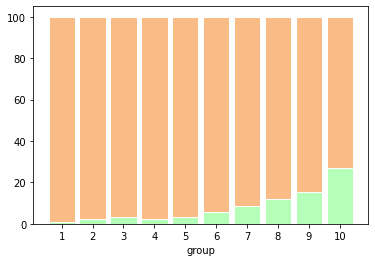

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4, 5, 6, 7, 8, 9]

 
# From raw value to percentage
totals = [i+j for i,j in zip(decile_opt['event'], decile_opt['not_event'])]
greenBars = [i / j * 100 for i,j in zip(decile_opt['event'], totals)]
orangeBars = [i / j * 100 for i,j in zip(decile_opt['not_event'], totals)]
 
# plot
barWidth = 0.85
names = ('1','2','3','4','5', '6', '7', '8', '9', '10')
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("group")
 
# Show graphic
plt.show()

In [86]:
from eli5.permutation_importance import get_score_importances

C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Anaconda3\envs\benedito_deep\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [87]:
def score(X, y):
    y_pred = NN_Model.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

KeyboardInterrupt: 

In [83]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.04147385397928174, 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231, 'EXT_SOURCE_2': 0.0107817142549393, 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425, 'remaining_pmts_monotonic': 0.008512465564440274, 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633, 'EXT_SOURCE_3': 0.005333526638901831, 'amt_paid_down': 0.00494994491753018, 'EXT_SOURCE_1': 0.004571628609031797, 'CODE_GENDER_M': 0.0030070075672879114, 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083, 'cnt_appl_previous': 0.002644439411447075, 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754, 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677, 'FLAG_OWN_CAR_Y': 0.0024660404912654867, 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901, 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437, 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487, 'COUNT(bureau)': 0.0023102660163520916, 'SKEW(previous.DAYS_DECISION

In [84]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.04147385397928174,
 'SUM(previous.CNT_PAYMENT)': 0.011273609606421231,
 'EXT_SOURCE_2': 0.0107817142549393,
 'avg_pos_cash_cnt_installment_future_previous': 0.009114044995958425,
 'remaining_pmts_monotonic': 0.008512465564440274,
 'max_pos_cash_sk_dpd_def_previous': 0.005920151336140633,
 'EXT_SOURCE_3': 0.005333526638901831,
 'amt_paid_down': 0.00494994491753018,
 'EXT_SOURCE_1': 0.004571628609031797,
 'CODE_GENDER_M': 0.0030070075672879114,
 'NAME_FAMILY_STATUS_Married': 0.0028596721787605083,
 'cnt_appl_previous': 0.002644439411447075,
 'avg_amt_credit_card_total_receivable_previous': 0.002642083199293754,
 'amt_credit_sum_debt_credit_card_bureau': 0.00251845419018677,
 'FLAG_OWN_CAR_Y': 0.0024660404912654867,
 'SUM(previous.DAYS_FIRST_DUE)': 0.002446301203735901,
 'avg_cnt_credit_card_drawings_atm_previous': 0.0024455799143011437,
 'days_phone_change_over_gap_amt_installment_monotonic': 0.0023450081241233487,
 'COUNT(bureau)': 0.0023102660163520916,
 'SKEW(pre

In [85]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=class_tree.feature_importances_[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 207, 'avg_pos_cash_cnt_installment_future_previous': 113, 'EXT_SOURCE_2': 105, 'EXT_SOURCE_1': 104, 'EXT_SOURCE_3': 83, 'amt_paid_down': 77, 'MEAN(bureau.AMT_CREDIT_SUM)': 75, 'remaining_pmts_monotonic': 74, 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68, 'SUM(previous.DAYS_FIRST_DUE)': 67, 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64, 'amt_credit_sum_consumer_credit_bureau': 60, 'tot_debt_lim_ratio': 60, 'AMT_GOODS_PRICE_monotonic': 57, 'max_installments_gap_amt_payment_previous': 54, 'SKEW(previous.DAYS_DECISION)': 51, 'SKEW(bureau.DAYS_CREDIT)': 48, 'max_pos_cash_sk_dpd_def_previous': 46, 'OWN_CAR_AGE_monotonic': 46, 'STD(previous.CNT_PAYMENT)': 42, 'missing_rate_monotonic': 42, 'STD(bureau.DAYS_CREDIT)': 40, 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40, 'MAX(previous.DAYS_DECISION)': 38, 'DAYS_REGISTRATION_monotonic': 38, 'amt_credit_sum_debt_credit_card_bureau': 37, 'cnt_refused_previous': 37, 'MIN(bureau.DAYS_CREDIT)': 37, 'credit_income_ratio_monotonic': 37, 'gap_avg_application_c

In [86]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 207,
 'avg_pos_cash_cnt_installment_future_previous': 113,
 'EXT_SOURCE_2': 105,
 'EXT_SOURCE_1': 104,
 'EXT_SOURCE_3': 83,
 'amt_paid_down': 77,
 'MEAN(bureau.AMT_CREDIT_SUM)': 75,
 'remaining_pmts_monotonic': 74,
 'MAX(bureau.DAYS_CREDIT_UPDATE)': 68,
 'SUM(previous.DAYS_FIRST_DUE)': 67,
 'SUM(bureau.DAYS_CREDIT_ENDDATE)': 64,
 'amt_credit_sum_consumer_credit_bureau': 60,
 'tot_debt_lim_ratio': 60,
 'AMT_GOODS_PRICE_monotonic': 57,
 'max_installments_gap_amt_payment_previous': 54,
 'SKEW(previous.DAYS_DECISION)': 51,
 'SKEW(bureau.DAYS_CREDIT)': 48,
 'max_pos_cash_sk_dpd_def_previous': 46,
 'OWN_CAR_AGE_monotonic': 46,
 'STD(previous.CNT_PAYMENT)': 42,
 'missing_rate_monotonic': 42,
 'STD(bureau.DAYS_CREDIT)': 40,
 'MEDIAN(bureau.DAYS_CREDIT_UPDATE)': 40,
 'MAX(previous.DAYS_DECISION)': 38,
 'DAYS_REGISTRATION_monotonic': 38,
 'amt_credit_sum_debt_credit_card_bureau': 37,
 'cnt_refused_previous': 37,
 'MIN(bureau.DAYS_CREDIT)': 37,
 'credit_income_ratio_monotonic'

In [87]:
def score(X, y):
    y_pred = class_tree.predict(X)
    return metrics_sk.roc_auc_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test_final, y_test_final)
feature_importances = np.mean(score_decreases, axis=0)

In [88]:
feature_importance_dict = {}
for i, feature_name in enumerate(feats):
    feature_importance_dict[feature_name]=feature_importances[i]
print(dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1]))

{'mean_knn_target': 0.012563996405093448, 'EXT_SOURCE_2': 0.007994122933686065, 'max_installments_gap_amt_payment_previous': 0.0040439332586077684, 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006, 'FLOORSMAX_AVG_monotonic': 0.003942616136013988, 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852, 'EXT_SOURCE_3': 0.0037620293045470985, 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156, 'CODE_GENDER_M': 0.003466324679302657, 'amt_paid_down': 0.003393955306021423, 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855, 'tot_debt_lim_ratio': 0.002729503478778916, 'amt_credit_max_overdue_bureau': 0.0024117514398138916, 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655, 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945, 'remaining_pmts_monotonic': 0.0017611002837552236, 'OWN_CAR_AGE_monotonic': 0.0016825037783544604, 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316, 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807, 'EXT_SOURCE_1': 0.0014219740345420505, 'MEDIAN(burea

In [89]:
dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)[:-1])

{'mean_knn_target': 0.012563996405093448,
 'EXT_SOURCE_2': 0.007994122933686065,
 'max_installments_gap_amt_payment_previous': 0.0040439332586077684,
 'MEAN(bureau.AMT_CREDIT_SUM)': 0.003993611299047006,
 'FLOORSMAX_AVG_monotonic': 0.003942616136013988,
 'SUM(previous.DAYS_FIRST_DRAWING)': 0.003805450928515852,
 'EXT_SOURCE_3': 0.0037620293045470985,
 'AMT_GOODS_PRICE_monotonic': 0.003646238307297156,
 'CODE_GENDER_M': 0.003466324679302657,
 'amt_paid_down': 0.003393955306021423,
 'STD(bureau.DAYS_ENDDATE_FACT)': 0.0029390380595582855,
 'tot_debt_lim_ratio': 0.002729503478778916,
 'amt_credit_max_overdue_bureau': 0.0024117514398138916,
 'max_pos_cash_sk_dpd_def_previous': 0.0022821597713800655,
 'DAYS_ID_PUBLISH_monotonic': 0.00211604681456945,
 'remaining_pmts_monotonic': 0.0017611002837552236,
 'OWN_CAR_AGE_monotonic': 0.0016825037783544604,
 'SUM(previous.AMT_GOODS_PRICE)': 0.0016680299036982316,
 'MEAN(previous.AMT_CREDIT)': 0.0016177079441375807,
 'EXT_SOURCE_1': 0.001421974034542